In [15]:
library(tuneR, warn.conflicts = F, quietly = T)
library(signal, warn.conflicts = F, quietly = T) # signal processing functions
library(oce, warn.conflicts = F, quietly = T) # image plotting functions and nice color maps
#library(Rwave, warn.conflicts = F, quietly = T)

Warning message in specgram(x = x, n = NFFT, Fs = 1/dt, overlap = 128, window = 256):
“specgram fft size adjusted to256”


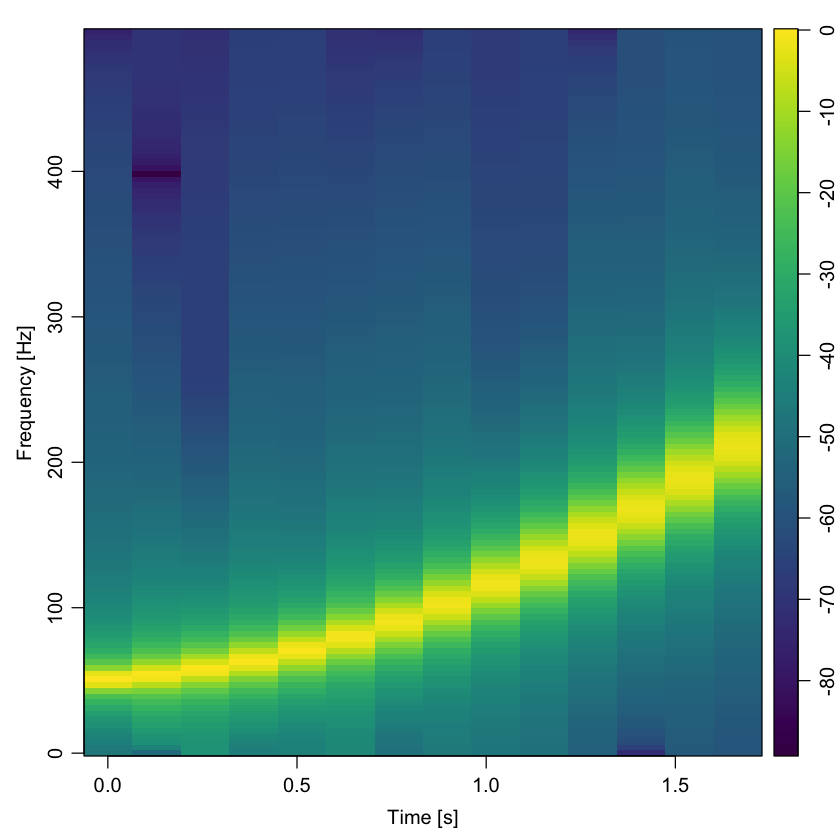

In [16]:
dt <- 0.001
t <- seq(0,2,dt)
f0 <- 50
f1 <- 250
t1 <- 2
x <- cos(2*pi*t*(f0 + (f1-f0)*(t^2)/(3*(t1^2))))

NFFT <- 128

spec <- specgram(x = x, n = NFFT, Fs=1/dt, overlap=128, window=256)

# discard phase information
P = abs(spec$S)

# normalize
P = P/max(P)

# convert to dB
P = 10*log10(P)

# config time axis
t = spec$t

# plot spectrogram
imagep(x = t,
       y = spec$f,
       z = t(P),
       col = oce.colorsViridis,
       ylab = 'Frequency [Hz]',
       xlab = 'Time [s]',
       drawPalette = T,
       decimate = F
)